## Tune shift from secondaries in IP7

In [1]:
%pylab notebook
import pytimber
import datetime
import pickle
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
mdb=pytimber.LoggingDB(source='mdb')


folder='TDI_scan'
output_path='/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/MD/LHC/2016/'+folder+'/'
os.system('mkdir -p '+output_path)
tag='TDI_fullscan'

beam=2

ts1 = '2016-04-09 10:30:00' # start time
ts2 = '2016-04-09 10:50:00' # end time

In [3]:
# BCT
import LHC_BCT
reload(LHC_BCT)

data=mdb.get(LHC_BCT.variable_list(beams=[beam]),ts1,ts2)
pickle.dump( data, open( output_path+"BCT"+tag+"_B%d.pkl"%beam, "wb" ) )
data = pickle.load( open( output_path+"BCT"+tag+"_B%d.pkl"%beam, "rb" ) )

BCT=LHC_BCT.BCT(data,beam=beam)

In [4]:
# BBQ

import LHC_BBQ
reload(LHC_BBQ)

data=mdb.get(LHC_BBQ.variable_list(beams=[beam]),ts1,ts2)
pickle.dump( data, open( output_path+"BBQ"+tag+"_B%d.pkl"%beam, "wb" ) )
data = pickle.load( open( output_path+"BBQ"+tag+"_B%d.pkl"%beam, "rb" ) )
BBQ=LHC_BBQ.BBQ(data,beam=beam)

figure()
plot(BBQ.t_str, BBQ.amp_1, "-k")
plot(BBQ.t_str, BBQ.amp_2, "-r")
xlabel("Time")
ylabel("BBQ amp1")
title('B%d'%(BBQ.beam))
legend(['amp1','amp2'])
xfmt = mpl.dates.DateFormatter('%H:%M:%S')
gca().xaxis.set_major_formatter(xfmt)

<IPython.core.display.Javascript object>

In [5]:
# BBQ FFT
import LHC_BBQ

# BBQ
data=mdb.get(LHC_BBQ.variable_list(beams=[beam]),ts1,ts2)
data = pickle.load( open( output_path+"BBQ"+tag+"_B%d.pkl"%beam, "rb" ) )
BBQ_FFT=LHC_BBQ.BBQ_FFT(data,beam=beam)
df=1./2/len((BBQ_FFT.fft_h[0]))

figure()
plot( np.arange(0,0.5,df),(BBQ_FFT.fft_h[0]), "-" )
plot(  np.arange(0,0.5,df),(BBQ_FFT.fft_v[0]), "-r" )
title(BBQ_FFT.t_str[0])

# Waterfall
figure()
subplot(1,2,1)
mindate = mpl.dates.date2num(BBQ_FFT.t_str[0])
maxdate = mpl.dates.date2num(BBQ_FFT.t_str[-1])
img = plt.imshow(BBQ_FFT.fft_h, origin='lower', cmap='hsv', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = DateFormatter('%H:%M:%S')
gca().yaxis.set_major_formatter(hfmt)

title('B%d BBQ-FFT-H: '%BBQ_FFT.beam +
    str(BBQ_FFT.t_str[0].strftime('%d/%m/%y')) )

xlim(0.25, 0.35)

subplot(1,2,2)
mindate = mpl.dates.date2num(BBQ_FFT.t_str[0])
maxdate = mpl.dates.date2num(BBQ_FFT.t_str[-1])
img = plt.imshow(BBQ_FFT.fft_v, origin='lower', cmap='hsv', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = DateFormatter('%H:%M:%S')
gca().yaxis.set_major_formatter(hfmt)

title('B%d BBQ-FFT-V: '%BBQ_FFT.beam +
    str(BBQ_FFT.t_str[0].strftime('%d/%m/%y')) )

tight_layout()
xlim(0.25, 0.35)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.25, 0.35)

In [6]:
# RAW BBQ
import LHC_BBQ
reload(LHC_BBQ)

data=mdb.get(LHC_BBQ.variable_list_RAW(beams=[beam]),ts1,ts2)
pickle.dump( data, open( output_path+"BBQ_RAW"+tag+"_B%d.pkl"%beam, "wb" ) )
data = pickle.load( open( output_path+"BBQ_RAW"+tag+"_B%d.pkl"%beam, "rb" ) )

BBQG_RAW=LHC_BBQ.BBQG_RAW(data,beam=beam)

figure()
plot((BBQG_RAW.h[0]), "-" )

<IPython.core.display.Javascript object>

In [7]:
# Collimators

import LHC_Coll
reload(LHC_Coll)

data=mdb.get(LHC_Coll.variable_list(beam),ts1,ts2)
pickle.dump( data, open( output_path+"Coll"+tag+"_B%d.pkl"%beam, "wb" ) )
data = pickle.load( open( output_path+"Coll"+tag+"_B%d.pkl"%beam, "rb" ) )

Coll=LHC_Coll.Coll(data,beam=beam)
Coll.select_coll('TDI.4L2:MEAS_LVDT_GU')


# figure()
# plot(Coll.t_str, Coll.values, "-b")
# xlabel("Time")
# ylabel("Collimator gap")
# title('B%d'%(Coll.beam))
# xfmt = mpl.dates.DateFormatter('%H:%M')
# gca().xaxis.set_major_formatter(xfmt)

KeyError: 'TDI.4L2:MEAS_LVDT_GU'

In [12]:
import copy
BBQ_app=copy.deepcopy(BBQG_RAW)

### Clean uncorrelated noise with SVD cut

<IPython.core.display.Javascript object>


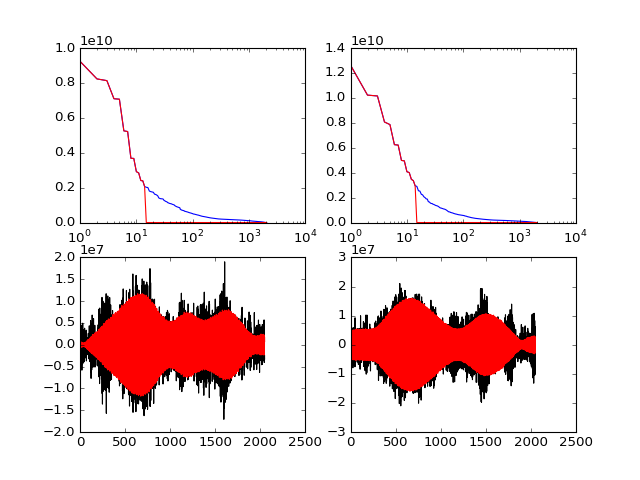

In [13]:
cut=15


U, s, V = np.linalg.svd(BBQ_app.h, full_matrices=False)

figure()
subplot(2,2,1)
semilogx(s)
s[cut:-1]=0
semilogx(s,'r')

subplot(2,2,3)
plot(BBQ_app.h[0],'-k')
BBQ_app.h=np.dot(U,np.dot(np.diag(s),V))
plot(BBQ_app.h[0],'-r')

U, s, V = np.linalg.svd(BBQ_app.v, full_matrices=False)
subplot(2,2,2)
semilogx(s)
s[cut:-1]=0
semilogx(s,'r')

subplot(2,2,4)
plot(BBQ_app.v[0],'-k')
BBQ_app.v=np.dot(U,np.dot(np.diag(s),V))
plot(BBQ_app.v[0],'-r')





###  Sussix

In [16]:
import PySUSSIX as ps
reload(ps)

qx0=0.280;
qy0=0.31;
ex=1e-3;
ey=1e-3;
es=1e-3

wx=[qx0-ex, qx0+ex];
wy=[qy0-ey, qy0+ey];

# Sussix it!
tuney_vec=[];tunex_vec=[]
spec=ps.Sussix()
spec.sussix_inp(nt1=1,nt2=2048,tunex=qx0,tuney=qy0,ex=ex,ey=ey,es=es,nharm=4)

for ii in np.arange(0,len(BBQ_app.h)):
    
    
    datax=BBQ_app.h[ii]
    datay=BBQ_app.v[ii]
    datax-=mean(datax)
    datay-=mean(datay)
    spec.sussix(datax,0*datax,
                datay,0*datay, 
                0*datax, 0*datay)
    
    a=spec.ox[spec.ax.argsort()]
    a*=np.sign(a)
    mask=(a<wx[1]) & (a>wx[0])
    
    if np.shape(a[mask])[0]>0:
        tunex=a[mask][-1]
    else: 
        tunex=np.NAN
    
    a=spec.oy[spec.ay.argsort()]
    a*=np.sign(a)
    mask=(a<wy[1]) & (a>wy[0])
    
    if np.shape(a[mask])[0]>0:
        tuney=a[mask][-1]
    else: 
        tuney=np.NAN
    
    

    tunex_vec.append(np.abs(tunex))
    tuney_vec.append(np.abs(tuney))
    

In [17]:
BBQ_app.qh=np.array(tunex_vec)
BBQ_app.qv=np.array(tuney_vec)
print BBQ_app.qh
print BBQ_app.qv

[ 0.27921976  0.27909893  0.27919143 ...,  0.27996223  0.2804758
  0.27944285]
[ 0.30969424  0.3100222   0.30965794 ...,  0.3091817   0.30922043
  0.3092272 ]


In [18]:
ind=np.isnan(BBQ_app.qh)
BBQ_app.qh=BBQ_app.qh[~ind]
BBQ_app.qv=BBQ_app.qv[~ind]
BBQ_app.t_stamps=BBQ_app.t_stamps[~ind]
BBQ_app.t_str=np.array(BBQ_app.t_str)[~ind]
BBQ_app.t_str=BBQ_app.t_str.tolist()
# BBQ_app.qh=0
np.shape(BBQ_app.t_str)

(7478,)

<IPython.core.display.Javascript object>


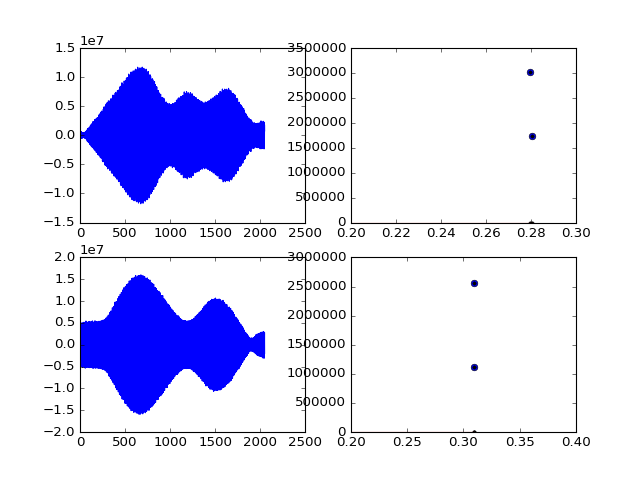

<IPython.core.display.Javascript object>


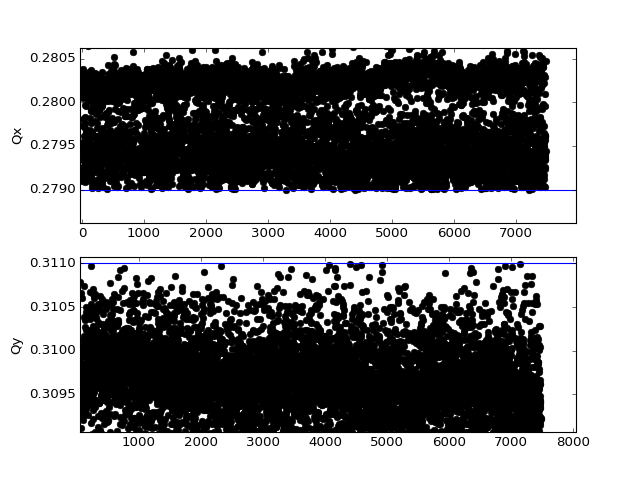

In [20]:
## plot RAW and spectrum    
figure()
subplot(2,2,1)
plot(BBQ_app.h[0])
spec.ax=spec.ax[spec.ox.argsort()]
spec.ox.sort()
subplot(2,2,2)
stem(spec.ox,spec.ax,'.k')
xlim(0.2 ,0.3)

subplot(2,2,3)
plot(BBQ_app.v[0])
spec.ay=spec.ay[spec.oy.argsort()]
spec.oy.sort()
subplot(2,2,4)
stem(spec.oy,spec.ay,'.k')
xlim(0.2 ,0.4)

# plot tunes
figure()
subplot(2,1,1)
plot(BBQ_app.qh, 'ok')
axhline(y=wx[0])
axhline(y=wx[1])
ylabel('Qx')
# ylim(wx[0] ,wx[1])
subplot(2,1,2)
plot(BBQ_app.qv,'ok')
axhline(np.array(wy[0]))
axhline(np.array(wy[1]))
ylabel('Qy')
# ylim(wy[0] ,wy[1])

### Moving average

<IPython.core.display.Javascript object>


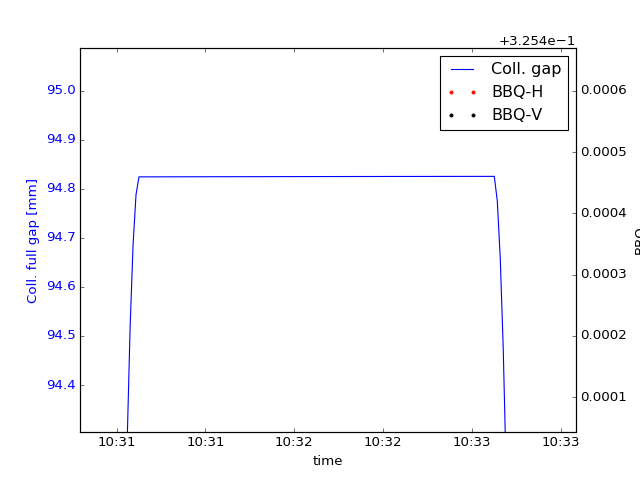

In [21]:
N=30;

BBQ_app.qh=np.convolve(np.ravel(BBQ_app.qh), np.ones((N,))/N,mode='same')
BBQ_app.qv=np.convolve(np.ravel(BBQ_app.qv), np.ones((N,))/N,mode='same')
Coll.values=np.convolve(Coll.values, np.ones((N,))/N,mode='same')

fig, ax1 = plt.subplots()
h0, =ax1.plot(Coll.t_str, Coll.values, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Coll. full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
h1,=ax2.plot(BBQ_app.t_str, BBQ_app.qh, 'r.')
h2,=ax2.plot(BBQ_app.t_str, BBQ_app.qv, 'k.')
ax2.set_ylabel('BBQ', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
ylim(0.25, 0.33)
legend([h0,h1,h2], ['Coll. gap','BBQ-H','BBQ-V'])

In [22]:
gu=94.8;
gd=5 #4

Coll.interp_with(BBQ_app)
BBQ_app.interp_with(Coll)



(1200,)
(8669,)


/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in less
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in greater
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in less
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


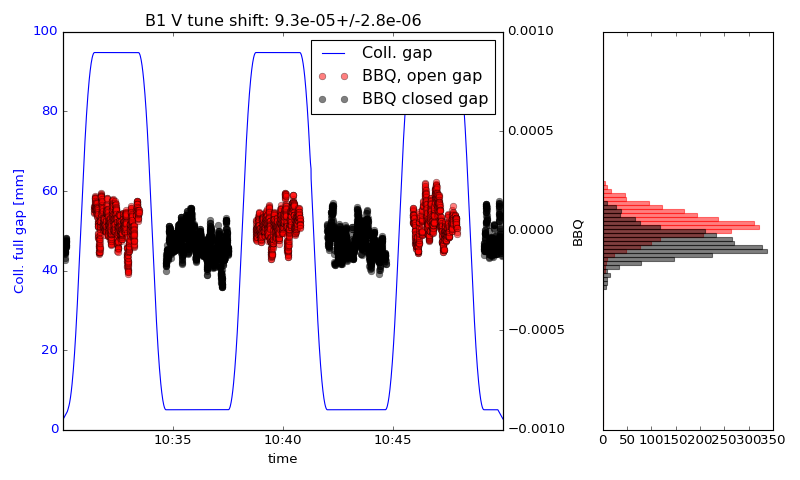

3.5e-05+/-1.4e-06
-5.9e-05+/-1.4e-06
tune shift: 9.3e-05+/-2.8e-06


In [23]:
x=BBQ_app.t_stamps
y=BBQ_app.qv

mask_tune=(y<wy[1]) & (y>wy[0])
p=np.polyfit(x[mask_tune],y[mask_tune],1)
slope=p[0]
intercept=p[1]
fit=slope*x+intercept


mask1=(Coll.values>gu) 

x=BBQ_app.t_stamps[mask1]
y=BBQ_app.qv[mask1]
fit1=fit[mask1]
mask_tune1=(y<wy[1]) & (y>wy[0])
x1=x;
y1=y-fit1
y1_mean=np.nanmean(y1[mask_tune1])
y1_std=np.nanstd(y1[mask_tune1])/np.sqrt(len(y1[mask_tune1]))

mask2=(Coll.values<gd) 
x=BBQ_app.t_stamps[mask2]
y=BBQ_app.qv[mask2]
fit2=fit[mask2]
mask_tune2=(y<wy[1]) & (y>wy[0])

x2=x
y2=y-fit2
y2_mean=np.nanmean(y2[mask_tune2])
y2_std=np.nanstd(y2[mask_tune2])/np.sqrt(len(y2[mask_tune2]))


ts_mean=y1_mean- y2_mean
ts_std=y1_std+y2_std


fig = plt.figure(figsize=(10, 6)) 
ax1 = subplot2grid((1,3), (0, 0), colspan=2)
h0, =ax1.plot(Coll.t_str, Coll.values, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Coll. full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)


ax2 = ax1.twinx()
h1,=ax2.plot(np.array(BBQ_app.t_str)[mask1][mask_tune1], y1[mask_tune1], 'or',alpha=.5,markerfacecolor='r',markeredgecolor='k')
h2,=ax2.plot(np.array(BBQ_app.t_str)[mask2][mask_tune2], y2[mask_tune2], 'ok',alpha=.5,markerfacecolor='k',markeredgecolor='k')
ax2.set_ylabel('BBQ', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
ylim(-ey, +ey)
legend([h0,h1,h2],['Coll. gap', 'BBQ, open gap','BBQ closed gap'])
title('B%d V tune shift: %.1e+/-%.1e'%(Coll.beam,ts_mean,ts_std))

ax=subplot2grid((3,3), (0, 2), rowspan=3)
bins=np.linspace(-ey,ey,100)
hist(y1[mask_tune1],bins,color='r',alpha=0.5,edgecolor='r',orientation='horizontal')
hist(y2[mask_tune2],bins,color='k',alpha=0.5,edgecolor='k',orientation='horizontal')
ylim(-ey, +ey)
ax.set_yticks([])

# fig.subplots_adjust(right=.8)
tight_layout() 


print '%.1e+/-%.1e'%(y1_mean,y1_std)
print '%.1e+/-%.1e'%(y2_mean,y2_std)
print 'tune shift: %.1e+/-%.1e'%(ts_mean,ts_std)

savefig(output_path+'B%dV_svd%d.pdf'%(beam,cut))

2620


<IPython.core.display.Javascript object>


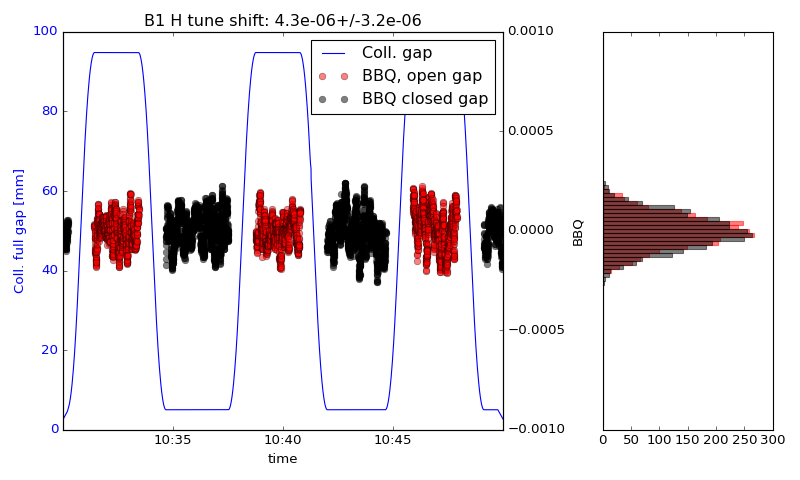

1.2e-06+/-1.6e-06
-3.1e-06+/-1.6e-06
tune shift: 4.3e-06+/-3.2e-06
B1H.pdf


In [24]:
x=BBQ_app.t_stamps
y=BBQ_app.qh

mask_tune=(y<wx[1]) & (y>wx[0])
p=np.polyfit(x[mask_tune],y[mask_tune],1)
slope=p[0]
intercept=p[1]
fit=slope*x+intercept


mask1=(Coll.values>gu) 

x=BBQ_app.t_stamps[mask1]
y=BBQ_app.qh[mask1]
fit1=fit[mask1]
mask_tune1=(y<wx[1]) & (y>wx[0])
x1=x;
y1=y-fit1
y1_mean=np.nanmean(y1[mask_tune1])
y1_std=np.nanstd(y1[mask_tune1])/np.sqrt(len(y1[mask_tune1]))
print len(y1[mask_tune1])

mask2=(Coll.values<gd) 
x=BBQ_app.t_stamps[mask2]
y=BBQ_app.qh[mask2]
fit2=fit[mask2]
mask_tune2=(y<wx[1]) & (y>wx[0])

x2=x
y2=y-fit2
y2_mean=np.nanmean(y2[mask_tune2])
y2_std=np.nanstd(y2[mask_tune2])/np.sqrt(len(y2[mask_tune2]))

ts_mean=y1_mean- y2_mean
ts_std=y1_std+y2_std

fig = plt.figure(figsize=(10, 6)) 
ax1 = subplot2grid((1,3), (0, 0), colspan=2)
h0, =ax1.plot(Coll.t_str, Coll.values, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Coll. full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)


ax2 = ax1.twinx()
h1,=ax2.plot(np.array(BBQ_app.t_str)[mask1][mask_tune1], y1[mask_tune1], 'or',alpha=.5,markerfacecolor='r',markeredgecolor='k')
h2,=ax2.plot(np.array(BBQ_app.t_str)[mask2][mask_tune2], y2[mask_tune2], 'ok',alpha=.5,markerfacecolor='k',markeredgecolor='k')
ax2.set_ylabel('BBQ', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
ylim(-ex, +ex)
legend([h0,h1,h2],['Coll. gap', 'BBQ, open gap','BBQ closed gap'])
title('B%d H tune shift: %.1e+/-%.1e'%(Coll.beam,ts_mean,ts_std))

ax=subplot2grid((3,3), (0, 2), rowspan=3)
bins=np.linspace(-ex,ex,100)
hist(y1[mask_tune1],bins,color='r',alpha=0.5,edgecolor='r',orientation='horizontal')
hist(y2[mask_tune2],bins,color='k',alpha=0.5,edgecolor='k',orientation='horizontal')
ylim(-ex, +ex)
ax.set_yticks([])

# fig.subplots_adjust(right=.8)
tight_layout() 


print '%.1e+/-%.1e'%(y1_mean,y1_std)
print '%.1e+/-%.1e'%(y2_mean,y2_std)
print 'tune shift: %.1e+/-%.1e'%(ts_mean,ts_std)

print 'B%dH.pdf'%beam
savefig(output_path+'B%dH_svd%d.pdf'%(beam,cut))